# 5.3 Introduction to Statistics

## Overview

Today's class reviews summary statistics previously taught in Unit 1 and covers the implementation of these statistical measures in Python. This lesson also introduces new statistical concepts such as sample versus population, standard error, Pearson correlation coefficient, and linear regression.

### Class Objectives

By the end of this class, students will be able to:

* Calculate summary statistics such as mean, median, mode, variance and standard deviation using Python.
* Plot, characterize, and quantify a normally distributed dataset using Python.
* Qualitatively and quantitatively identify potential outliers in a dataset.
* Differentiate between a sample and a population in regards to a dataset.
* Define and quantify correlation between two factors.
* Calculate and plot a linear regression in Python.

# 1. Welcome & Intro Presentation

## 📣 1.1 Instructor Do: Welcome Students


  * Welcome to Day 3 of Matplotlib. Today's lesson will focus on bringing together our knowledge of fundamental statistics with Matplotlib and SciPy.


## 📣 1.2 Instructor Do: Summary Statistics in Python

  * The most common measures of central tendency are the **mean**, **median** and **mode**.

  * The **mean** of a dataset is what is known as the arithmetic average of a dataset. It is calculated from the sum all of the numbers divided by the number of elements in a dataset.

  * The **median** of a dataset is the middle element. It is calculated from listing the data numerically and selecting the middle element. For even-length datasets, the average of the 2 center elements is the median of the dataset.

  * The **mode** of a dataset is the most frequently occurring element. The mode can be used for either numeric or categorical data.

    ![Categorical Mode](Images/catagorical_mode.png)

* With Python, there are a number of ways to measure the central tendency of the data. However, for this class we will be looking at the NumPy and SciPy packages and modules.

  * We will use the NumPy package to test for `mean` and `median` and use the SciPy package to test for `mode`.

  * The reason we need to use both NumPy and SciPy modules to calculate the measures of central tendency is that mode is not a function in NumPy. This is likely because NumPy is a very lightweight module and calculating the mode can be computationally intensive.

* Pandas also provides functions to measure central tendency, but students will need to look at the documentation on their own.

  * The reason we would want to plot new data as soon as possible is to identify key characteristics about the data.

  * Key characteristics can include if the data is normally distributed, if the data is multimodal, or if there are clusters in the data.

  * Data is considered normally distributed when measurements are obtained independent of one another.

  * Another characteristic of normally distributed data is that its distribution follows a characteristic bell-curve shape.

  * **Variance** is the measurement of how far each number in the dataset is away from the mean of the dataset.

  * **Standard deviation** is the square root of the variance.

  * When calculating the variance and standard deviation in Python, we will use the NumPy module.

```python
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Read in the LAX temperature data
temperature_df = pd.read_csv('Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = sts.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")
```

* This first dataset contains National Oceanic and Atmospheric Administration temperature measurements taken at the Los Angeles International (LAX) airport.

  * To calculate the mean, NumPy provides a decimal with far too much precision. Therefore we should always round the output of `numpy.mean`. In most cases, rounding the mean to the nearest hundredth decimal is sufficient.

  * To calculate the median, NumPy also can provide a decimal with far too much precision. However, with this dataset, the median was already rounded.

  * To calculate the mode, the `scipy.stats` module returns 2 arrays, one for all mode values, another for the frequency of each mode.

* The easiest way to assert if a dataset has multiple modes, clusters of values, or if the dataset is normally distributed, is to plot the data using Matplotlib.

```python
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(temperatures.sample(50)))
```

![the histogram of the temperature data appears normally distributed](Images/intro_norm_dist.png)

* There only appears to be one mode in the dataset. Furthermore, the distribution of temperatures around the mode seems to form a bell curve.

  * This bell-curve characteristic is known in statistics as a **normal distribution**.

  * The theory behind a **normal distribution** is outside of the scope of this lesson, but it is important to know whether your data is normally distributed.

* Many statistical tests assume that the data is normally distributed. Using such statistical tests when the data is _not_ normally distributed can cause us to draw incorrect conclusions.

  * The `stats.normaltest` function offers a more quantitative verification of normal distribution.

  * When we used `stats.normaltest` in our example code, we also used the Pandas `DataFrame.sample` function.

  * Because `stats.normaltest` function assumes a relatively small sample size, we could not run the test on our entire temperature data. Therefore, we must test on a subset of randomly selected values using Pandas's `DataFrame.sample` function.

  * We interpret the results of `stats.normaltest` using the **p** value. A **p** value 0.05 or larger indicates normally distributed data.

  * Because our **p** value is approximately 0.05 or greater, we can conclude that this distribution is normal.

```python
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")
```

* Point out that to calculate the total variance or standard deviation in NumPy, we must provide the list of numbers as well as `ddof =0`.

  * The `ddof = 0` argument is to ensure we calculate the population variance and standard deviation.

  * We will talk about sample versus population later in the class.

* Execute the next code block.

```python
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")
```

* When we have a dataset that is normally distributed, we can use the **68-95-99.7** rule to characterize the data.

  * The **68-95-99.7** rule states that roughly 68% of all values in normally distributed data fall within one standard deviation of the mean (in either direction). Additionally, 95% of the values fall within two standard deviations, and 99.7% of the values fall within three standard deviations.

  * The z-score is the number of standard deviations a given number is from the mean of the dataset.

  * To calculate a z-score in Python, we must use the SciPy `stats.zscore` function.

```python
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")
```

* The output of `stats.zscore` is a list of z-scores that is equal in length to the list of temperatures. Therefore, if we want to know the z-score for any given value, we must find use index of that value from the temperature list.


In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

In [4]:
temperature_df.shape

(3529, 4)

In [5]:
temperature_df.head()

,STATION,DATE,REPORT_TYPE,HourlyDryBulbTemperature
0,72295023174,2019-01-01T00:49:00,FM-16,52
1,72295023174,2019-01-01T00:53:00,FM-15,51
2,72295023174,2019-01-01T01:53:00,FM-15,52
3,72295023174,2019-01-01T02:53:00,FM-15,49
4,72295023174,2019-01-01T03:53:00,FM-15,43


In [6]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = sts.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

The mean temperature at the LAX airport is 57.65514310002834
The median temperature at the LAX airport is 57.0
The mode temperature at the LAX airport is ModeResult(mode=array([57], dtype=int64), count=array([327]))


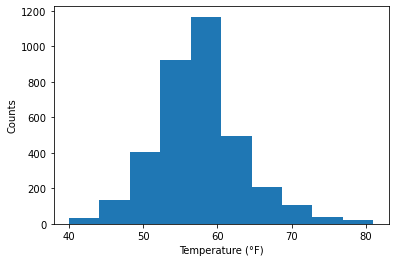

NormaltestResult(statistic=0.9680950118367873, pvalue=0.6162839240830551)


In [7]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(temperatures.sample(50)))

In [8]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 32.33077618382964
The population standard deviation using the NumPy module is 5.686015844493369


In [9]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 51.969 and 63.341
Roughly 95% of the data is between 46.283 and 69.027
Roughly 99.7% of the data is between 40.597 and 74.713


In [10]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [-0.99457041 -1.17044048 -0.99457041 ...  0.06065001  0.06065001
  0.06065001]


## 📣 1.3 Instructor Do: Quantiles and Outliers in Python

  * **Quantiles** are a way to divide our data into well-defined regions based on their order in a ranked list. The 2 most common quantiles used are **quartiles** and **percentiles**.

  * **Quartiles** divide the sorted data into 4 equal-sized groups and the median is known as the second quartile.

  * An **outlier** is an extreme value in a dataset that can skew a dataset. An **outlier** is typically identified as a value that is 1.5 * IQR (**interquartile range**) beyond the first and third quartiles.

  * We can visually identify quartiles and outliers using a box and whisker plot. Alternatively, we can identify quartiles using the `1.5 * IQR` rule.

  * When datasets are too large to identify the outliers visually, or when analysis requires more quantitative measures, we should calculate the interquartile range manually using Python modules.

* Execute the first 2 blocks of code.

```python
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()
```

![reaction times boxplot](Images/outlier_batting.png)

* This first dataset is a theoretical collection of reaction times measured at a baseball batting cage.

* A box and whisker plot is widely used in data science due to the amount of information it provides at-a-glance.

  * We render a box and whisker plot in Matplotlib using the `pyplot.boxplot` function.

  * The `pyplot.boxplot` function simply requires a list of numbers to draw.

  * The red line in the box plot is the median of the data.

  * The box surrounding the median is the IQR.

  * The whiskers that protrude from the box in the plot can be modified depending on the use, but by default represent 1.5 * IQR, or the outlier boundaries.

  * The data points that are located beyond the whiskers in the plot are potential outliers.

  * In this dataset, the 2 smallest data points appear to be outliers.

![the annotated boxplot](Images/outlier_boxplot_annot.png)

* Execute the next block of code.

```python
# We need to sort the data to determine which could be outliers
times.sort()
print(times)
```
* Once we have identified potential outliers in a box and whisker plot, we can use the sorted dataset to estimate which of the data points fall outside the outlier boundary.

* Point out that the 5 ms and 85 ms times are outside of the whiskers and may merit investigation.

* Execute the next block of code.

```python
# The second example again looks at the LAX temperature data set and computes quantiles
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()
```

![The LAX temperatures have too many data points to identify outliers](Images/outliers_temperatures.png)

* This example is looking back at the LAX temperatures from NOAA.

  * This dataset has over 3,000 data points and we already know it to be normally distributed.

  * When we know a dataset is normally distributed, we can expect at least a few data points to be potential outliers.

* We can also identify potential outliers using Pandas.

* We can use Pandas to easily calculate the interquartile range to generate the outlier boundaries.

* Execute the next block of code.

```python
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
```

* In order to properly calculate the lower and upper quartiles of a dataset we would need to calculate the median of our dataset. Once we split our data into two groups using the median, we would then need to find the median of the lower and upper groups to determine the quartiles.

* A very common practice in data science is to approximate the median-of-a-median quartile values by using prebuilt quantile functions such as Pandas's `quantile` method.

* Pandas's `quantile` method requires decimal values between 0 and 1. In addition you must pass the quantile as the index instead of relative index values.

```python
# You cannot pass a 0 index to retrieve the first element,
# it requires the actual value of 0.25
lowerq = quartiles[0.25]
```

* Once you have calculated the IQR, you can create the boundaries to quantitatively determine any potential outliers.

* Slack out the solution notebook for students to refer to in the next activity.

In [11]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

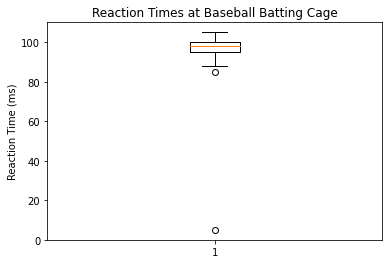

In [12]:
# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()

In [13]:
# We need to sort the data to determine which could be outliers
times.sort()
print(times)

[5, 85, 88, 95, 96, 97, 98, 98, 100, 100, 101, 102, 105]


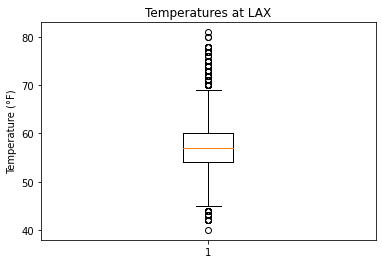

In [14]:
# The second example again looks at the LAX temperature data set and computes quantiles
temperature_df = pd.read_csv('Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

In [15]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.0
The upper quartile of temperatures is: 60.0
The interquartile range of temperatures is: 6.0
The the median of temperatures is: 57.0 
Values below 45.0 could be outliers.
Values above 69.0 could be outliers.


## ✏️ 2.1 Student Do: Summary Statistics in Python

# Summary Statistics in Python

## Instructions

* Using Pandas, import the California housing dataset from the Resources folder.

* Determine the most appropriate measure of central tendency to describe the population. Calculate this value.

* Use both data visualization and a quantitative measurement to find whether the age of houses in California is considered normally distributed.

* Inspect the average occupancy of housing in California and determine if there are any potential outliers in the dataset.

  * **Hint**: This dataset is very large.

* If there are potential outliers in the average occupancy, find the minimum and maximum of the median housing prices across the outliers.

## Bonus

Plot the latitude and longitude of the California housing data using Matplotlib and color the data points using the median income of the block. Does any location seem to be an outlier?

- - -

In [ ]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [17]:
# Read in the california housing data set
california_df = pd.read_csv("Resources/California_Housing.csv")

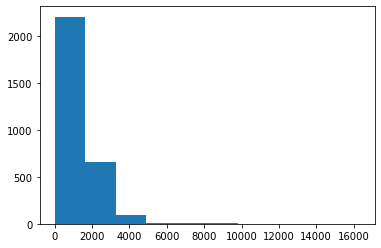

1387.9633333333334
1152.5
ModeResult(mode=array([1128.]), count=array([8]))


In [30]:
# Determine which measure of central tendency is most appropriate to describe the Population
population = california_df['Population']
plt.hist(population)
plt.show()
print(np.mean(population))
print(np.median(population))
print(sts.mode(population))

In [31]:
# Determine if the house age in California is considered normally distributed
#california_df.head(5)
house_age= california_df['HouseAge']
sts.normaltest(house_age.sample(100))

NormaltestResult(statistic=6.126927002096717, pvalue=0.04672558054267481)

In [21]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


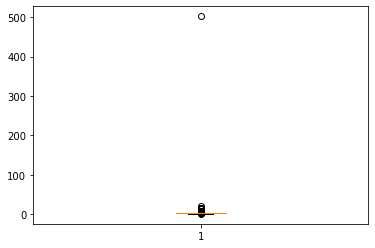

In [22]:
# Determine if there are any potential outliers in the average occupancy in California
average_occup = california_df['AveOccup']
fig1, ax1 = plt.subplots()
ax1.boxplot(average_occup)
plt.show()

In [32]:
np.std(average_occup)

9.172869733470364

In [24]:
np.sort(average_occup)

array([  1.06060606,   1.28060264,   1.31604343, ...,  17.17770035,
        21.33333333, 502.46153846])

In [28]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
med_inc = california_df['MedInc']
quartiles = med_inc.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
med = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound*1000} could be outliers.")
print(f"Values below {upper_bound*1000} could be outliers.")
print(f"Values mid {med*1000} ")

Values below -621.1875000000005 could be outliers.
Values below 7941.1125 could be outliers.
Values mid 3530.35 


In [35]:
outliers = california_df.loc[(california_df["AveOccup"]<lower_bound) | (california_df["AveOccup"]<upper_bound)]

In [ ]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.

## 📣 3.1 Instructor Do: Sample, Population, and SEM

* Weeks before Election Day, a local newspaper in a hypothetical city wants to predict the winner of the mayoral election. The newspaper will poll voters for their intended candidate. Point out the following:

  * It would be prohibitively expensive to ask every voter in the city whom they will vote for, nor is it possible to know exactly which people will go out and vote on Election Day.

  * The newspaper must therefore ask a _subset_ of all eligible voters in the city about their voting habits and _extrapolate_ information from the results.

  * In this scenario, the newspaper decides to poll 1,000 eligible voters shopping at grocery stores across the city.

  * By using the polling results from the 1,000 eligible voters, the newspaper can try to make an accurate prediction of the mayoral election outcome.

* This hypothetical scenario is an example of a **sample** data set versus a **population** data set.

  * In statistics, a **population** is a complete data set that contains all possible elements of a study or experiment.

  * In this scenario, the population data set would be the voting habits of all eligible voters in the city.

  * In statistics, a **sample** is a subset of a population dataset, where not all elements of a study or experiment are collected or measured.

  * In this scenario, the sample dataset is the 1,000 eligible voters polled across the city.

  * In data science, the concept of sample versus population does not strictly apply to people or animals. Any comprehensive dataset is considered a population, and any dataset that is a subset of a larger data set is considered a sample.

* Execute the first 2 blocks of code to bring in the fuel economy dataset.

```python
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

# Sample versus population example fuel economy
fuel_economy = pd.read_csv('../Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())
```

* In this example we will be looking at 2019 vehicle fuel economy data from [fueleconomy.gov](https://https://www.fueleconomy.gov/feg/download.shtml). Our population data contains the fuel economy data for all 1,242 different 2019 model vehicles tested by the U.S. Department of Energy in 2018.

* Calculate the population mean and standard deviation using the notebook.

```python
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy.Combined_MPG.std(),2)}")
```

* The mean miles per gallon of all vehicles tested is 23.33, while the standard deviation of all vehicles tested is 5.94.

* Plot the histogram of the fuel efficiency of all vehicles tested using the notebook.

```python
plt.hist(fuel_economy.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()
```

![This is the histogram of the population fuel economy data.](Images/fuel_economy_hist.png)

* When it comes to selecting a sample dataset, it is important to obtain a dataset that is representative of the entire population.

* Subset the fuel economy data set using `fuel_economy.iloc[range(766,856)]` and calculate the mean and standard deviation of this sample. Plot the histogram of the sample data.

```python
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()
```

![This is the histogram of the sample data obtained non-randomly.](Images/fuel_economy_bias_hist.png)

* This sample data contains 90 data points from the fuel economy population dataset.

  * This sample data does not represent the population dataset well; the sample mean is much lower than the population mean and the sample standard deviation is far smaller than the population standard deviation.

  * The reason this sample does not represent the population data well is because it was not obtained using **random sampling**.

  * The random sampling is a technique in data science in which every subject or data point has an equal chance of being included in the sample.

  * This technique increases the likelihood that even a small sample size will include individuals from each group in the population.

* Subset the fuel economy dataset using `fuel_economy.sample(90)` and calculate the mean and standard deviation of this sample. Plot the histogram of the sample data.

```python
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()
```

![This is the histogram of the sample data obtained using random sampling.](Images/fuel_economy_random_hist.png)

* Pandas' `DataFrame.sample()` function uses random sampling to subset the DataFrame, creating a sample that is far more likely to represent the population data.

* Compare and contrast the calculated sample mean, standard deviations, and plots from both sample data sets.

  * Visually, the random sample has the same right skew to the distribution as the population data compared to the more normal distribution from the sliced sample.

  * The mean and standard deviation of the random sample are far closer to the population mean and standard deviation compared to the sliced sample.

* When describing a sample dataset using summary statistics such as the mean, quartiles, variance, and standard deviation, these statistical values are imperfect.

  * Fortunately, there are ways of quantifying the trustworthiness of a sample dataset.

  * The population mean mpg in the fuel economy data set is 23.33, while the population standard deviation of all vehicles is 5.94.

  * The standard deviation is seemingly large compared to the mean, especially considering there are 1,242 vehicles in the dataset.
  The larger standard deviation is most likely due to the variety of vehicle types in the dataset.

* In order for us to estimate how well a sample is representative of the total population, we calculate the **standard error** (**standard error of the mean**, or SEM) of the sample.

  * The standard error describes how far a sample's mean is from the population's "true" mean.

  * The standard error is a function of sample size; as sample size increases, the standard error decreases.

* The formula for standard error is unimportant. There is a [function in SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) that calculates standard error for us.

* Using the notebook, create a new sample dataset from the fuel economy population data using `fuel_economy.sample(30)`. Calculate the SEM value using SciPy's `stats.sem` function.

```python
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")
```

* One of the most common uses of SEM in data science is to compare and contrast sample data across a sample set. One easy way to visualize the differences in standard error across samples is to generate **error bars** on a scatter or line plot.

* Use the notebook to create a sample set of 10 samples, each containing 30 vehicles from the fuel economy population data.

```python
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]
```

* Calculate the mean and SEM of each sample using list comprehension and plot the data using Matplotlib's `pyplot.errorbar` function.

```python
# Generate the plot data for each sample
means = [sample.Combined_MPG.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()
```

![This plot demonstrates error bars on our sample means.](Images/fuel_economy_error_bars.png)

* The standard error essentially tells us how likely it is that the sample's mean is "close" to the population's mean—the one we actually care seek to estimate.

  * The error bars that are the largest are the samples whose mean is the least likely to represent the population mean.

  * If the standard error of the samples is too large, we can increase the number of data points in the sample to reduce the standard error.

* Slack out the solution notebook for students to refer to during the next activity.



In [36]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [37]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())

          Type  Combined_MPG                           Make_Model
0  Two Seaters       21.0000                            Acura_NSX
1  Two Seaters       27.9406                        ALFA ROMEO_4C
2  Two Seaters       20.9455  Aston Martin Lagonda Ltd_Vantage V8
3  Two Seaters       25.9952             Audi_TT Roadster quattro
4  Two Seaters       27.6300                     BMW_Z4 sDrive30i


The mean MPG of all vehicles is: 23.33
The standard deviation of all vehicle's MPG is: 5.94


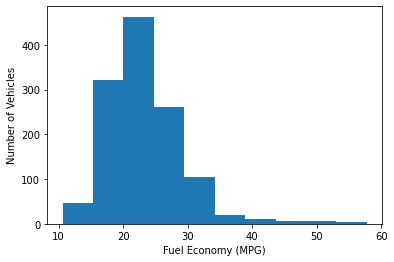

In [38]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy.Combined_MPG.std(),2)}")
plt.hist(fuel_economy.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 18.48
The standard deviation of all vehicle's MPG is: 2.41


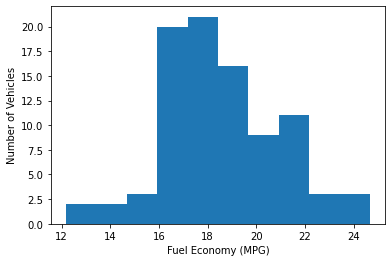

In [39]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]  #this is the sample using random, but it is not so good as 'sample' method
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 23.45
The standard deviation of all vehicle's MPG is: 6.4


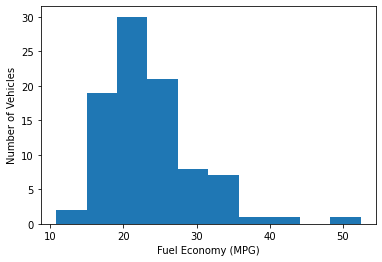

In [40]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [41]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")

The SEM value for the sample fuel economy data is 1.1969274032446295


In [42]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(90)
print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")

The SEM value for the sample fuel economy data is 0.6742946450468167


In [44]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for _ in range(0,10)]

In [ ]:
#vehicle_sample_set is a list of Data Frames. Each Data Frames corresponds to a sample


In [45]:
# Generate the plot data for each sample 
means = [sample.Combined_MPG.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

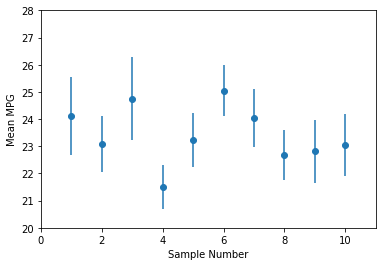

In [46]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()

## ✏️ 3.2 Student Do: SEM and Error Bars

# SEM and Error Bars

## Instructions

Work with a partner on this activity. Be sure to compare your calculated values as you progress through the activity.

* Execute the starter code to import the Boston housing data set from scikit-learn.

* Create a sample set of median housing prices using Pandas. Be sure to create samples of size 20.

* Calculate the means and standard errors for each sample.

* Create a plot displaying the means for each sample, with the standard error as error bars.

* Calculate the range of SEM values across the sample set.

* Determine which sample's mean is closest to the population mean.

* Compare this sample's mean to the population's mean.

* Rerun your sampling code a few times to generate new sample sets. Try changing the sample size and rerunning the sampling code.

* Discuss with your partner what changes you observe when sample size changes.

- - -

In [ ]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [ ]:
# Import the Boston housing data set from sklearn and get description
boston_dataset = load_boston()

In [ ]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target

In [ ]:
# Create a bunch of samples, each with sample size of 20

In [ ]:
# Calculate standard error of means

In [ ]:
# Determine which sample's mean is closest to the population mean

In [ ]:
# Compare to the population mean

In [ ]:
# Plot sample means with error bars

## 📣 4.1 Instructor Do: Correlation Conundrum

  * Often in data analysis we will ask the question "Is there any relationship between Factor A and Factor B?" This concept is known in statistics as **correlation**.

  ![This is an ideal positive correlation.](Images/corr_ideal_pos.png)

  * This is an example of a **positive correlation**. When two factors are positively correlated, they move in the same direction.

  * When the factor on the x-axis increases, the factor on the y-axis increases as well.

  ![This is an ideal negative correlation.](Images/corr_ideal_neg.png)

  * This is an example of a **negative correlation**. When two factors are negatively correlated, they move in opposite directions.

  * When the factor on the x-axis increases, the factor on the y-axis decreases.

  ![This is no correlation.](Images/corr_none.png)

  * This is an example of two factors with **no correlation**. When two factors are not correlated, their values are completely independent between one another.

* With real-world data, it can be difficult to determine if two factors are correlated.

  * In statistics we can calculate the degree of correlation using the **Pearson correlation coefficient**.

  * The Pearson correlation coefficient is a quantitative measure that describes simultaneous movement (variability) of two factors.

    * The correlation coefficient, which is often indicated with the letter *r**, will always fall between –1 and 1.

    * An _r_ value of 1 indicates a perfect positive correlation, while an _r_ value of –1 indicates a perfect negative correlation.

    * An _r_ value of 0 means that there is no relationship between the two factors.

    * Most of the time, real-world data will not be the ideal case of -1,0, or 1. However, we can look at the correlation coefficient to determine how strongly or weakly two factors are related.

```python
# Import the WHO dataset, drop missing data
who_data = pd.read_csv('../Resources/WHO_data.csv')
who_data = who_data.dropna()
who_data.head()
```

* For this example, we are looking at a dataset from the World Health Organization. This dataset contains a number of factors collected by WHO for each country regarding health, population, wealth and social tendencies.

* Execute the next four blocks of code to produce plots of different pairs of factors. Ask the class which pairs of factors they believe to be correlated.

  ![income versus alcohol](Images/correlation_plot1.png)

  ![population versus cell phones](Images/correlation_plot2.png)

  ![expenditure versus expectancy](Images/correlation_plot3.png)

  ![income versus measles](Images/correlation_plot4.png)

* All four of these pairs of factors are correlated with one another to varying degrees.

  * We will use the **Pearson correlation coefficient** to quantitate the degree of correlation.

  * We do not need to know the mathematical equation to derive the correlation coefficient. This is because most programming languages and analytical software have correlation functions built in or available through an imported module or package.

* Return to the notebook and execute the next block of code. This time, we will take the same pairs of factors and use SciPy's `stats.pearsonr` function to quantify the correlation.

```python
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
income = who_data.iloc[:,1]
alcohol = who_data.iloc[:,8]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
```

* SciPy's `stats.pearsonr` function simply takes two numerical lists of values (i.e., two factors) and computes the Pearson correlation coefficient.

  * The output of the `stats.pearsonr` function returns both the _r_ value and a _p_ value. For now, we will only look at the _r_ value.

* Execute the next few blocks of code to reproduce the previous example's plots, but this time we accompany the plots with the Pearson's _r_ statistic.

![This is the code block that compares the plot with r-statistic.](Images/correlation_plot1_block.png)

* Across all four pairs of factors, we see the Pearson correlation coefficient range between .28 and .82. This means all four pairs of factors are positively correlated to varying degrees.

* There is a general rule of thumb when describing the strength of a correlation in regards to the absolute value of r. Show the students the following table:

![the correlation rule of thumb](Images/correlation_table.png)

* We can use this table along with our calculated _r_ values to describe if there is any relationship between two factors.

* That calculating correlations across an entire dataset is a great way to try to find relationships between factors that one could test or investigate with more depth. But caution the students that correlations are not designed to determine the outcome of one variable from another—remember the saying that "correlation does not equal causation."

In [ ]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
# Import the WHO dataset, drop missing data
who_data = pd.read_csv('../Resources/WHO_data.csv')
who_data = who_data.dropna()
who_data.head()

In [ ]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,8])
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
plt.show()

In [ ]:
plt.scatter(who_data.iloc[:,3],who_data.iloc[:,10])
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
plt.show()

In [ ]:
plt.scatter(who_data.iloc[:,5],who_data.iloc[:,7])
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
plt.show()

In [ ]:
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,12])
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
plt.show()

In [ ]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
income = who_data.iloc[:,1]
alcohol = who_data.iloc[:,8]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(income,alcohol)
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
age = who_data.iloc[:,3]
cell_phones = who_data.iloc[:,10]
correlation = st.pearsonr(age,cell_phones)
plt.scatter(age,cell_phones)
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
government = who_data.iloc[:,5]
life = who_data.iloc[:,7]
correlation = st.pearsonr(government,life)
plt.scatter(government,life)
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
income = who_data.iloc[:,1]
measles = who_data.iloc[:,12]
correlation = st.pearsonr(income,measles)
plt.scatter(income,measles)
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

## ✏️ 4.2 Student Do: Correlation Conquerors

# Correlation Conquerors

This activity gives students an opportunity to use SciPy to compare factors across the scikit-learn's wine recognition dataset.

The wine recognition dataset is "the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators." Measurements of * different constituents are taken for three types of wine.

## Instructions

* Execute the starter code to import the wine recognition dataset from scikit-learn.

* Using the dataset, plot the factors malic acid versus flavanoids on a scatter plot. Is this relationship positively correlated, negatively correlated, or not correlated? How strong is the correlation?

* Calculate the Pearson's correlation coefficient for  malic acid versus flavanoids. Compare the correlation coefficient to the Strength of Correlation table below. Was your prediction correct?

![correlation strength table](Images/correlation_table.png)

* Plot the factors alcohol versus color intensity on a scatter plot. Is this relationship positively correlated, negatively correlated, or not correlated? How strong is the correlation?

* Calculate the Pearson's correlation coefficient for alcohol versus color intensity. Compare the correlation coefficient to the Strength of Correlation table. Was your prediction correct?

## Bonus

* Look at the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) to find how to generate a correlation matrix. This matrix will contain the Pearson's correlation coefficient for all pairs of factors in the DataFrame.

* Generate the correlation matrix and try to find the pair of factors that generate the strongest positive and strongest negative correlations.

- - -

In [ ]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
# Read in the wine recognition data set from sklearn and load into Pandas
data = dta.load_wine()
wine_data = pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
# Plot malic_acid versus flavanoids on a scatterplot

In [ ]:
# Calculate the correlation coefficient between malic_acid and flavanoids

In [ ]:
# Plot alcohol versus colour_intensity on a scatterplot

In [ ]:
# Calculate the correlation coefficient between alcohol and color_intensity

In [ ]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations


## 📣 5.1 Instructor Do: Fits and Regression

  * The final important statistical topic for the day is **linear regression**. However, before we can discuss linear regression, we must first talk about the equation of a line.

  * The equation of a line defines the relationship between x-values and y-values.

  * When it comes to variables in the equation, we refer to the _x_ in the equation as the **independent variable**, and the _y_ as the **dependent variable**.

  * The **slope** of a line is denoted as _m_ in the equation, and the **_y_-intercept** is denoted as _b_ in the equation.

  * Knowing the slope and y-intercept of a line, we can determine any value of _y_ given the value for _x_. This is why we say _y_ is dependent on _x_.

  ![Plot of the exact y = x](Images/lineregress_plot1.png)

  * First plot is considered the ideal linear relationship of _y_ and _x_, where the _x_ and _y_ values are the same value.

  * In this plot, the equation for line is _y = x_ because the slope is equal to 1, and the _y_-intercept is equal to 0.

  * If we look at the _x_ value of 7 (denoted by the vertical dashed line), the corresponding _y_ value is also 7 (denoted by the horizontal dashed line).

  ![Plot with a smaller slope, larger intercept](Images/lineregress_plot2.png)

  * In this linear relationship between _x_ and _y_, the slope is much smaller, but the _y_-intercept is much larger.

  * If you plug an _x_ value of 7 into the equation, the resulting _y_ value is 6.4.

  * This idea of relating _x_ values and _y_ values using the equation of a line is the general concept of **linear regression**.

    * **Linear regression** is used in data science to model and predict the relationship between two factors.

    * Although this may sound similar to correlation, there is a big difference between the two concepts––correlation quantifies if "factor Y" and "factor X" are related, while regression predicts "factor Y" values given values from "factor X."

    * By fitting the relationship of two factors to a linear equation, linear regression  allows us to predict where data points we did not measure might end up if we had collected more data.

    * Linear regression is a truly powerful tool––it provides us the means to predict house prices, stock market movements, and the weather based on other data.

* We will not dive into the mathematical details of linear regression; rather, we will focus on how to use [SciPy's linregress function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) to perform a linear regression, and visualize the linear regression using Matplotlib.

```python
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# This example compares different factors in the Boston housing data set
boston_data = datasets.load_boston()
housing_data = pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)
housing_data['MEDV'] = boston_data.target

# Plot out rooms versus median house price
x_values = housing_data['RM']
y_values = housing_data['MEDV']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()
```

  ![Plot of nRooms versus median housing price](Images/lineregress_plot4.png)

* We are once again looking at the Boston housing dataset from scikit-learn. Specifically, we have plotted two factors from the Boston housing dataset in a scatter plot––rooms in a house versus the median housing prices.

* Visually we can see that there is a strong positive correlation between the two factors. We could say overall, when there are more rooms in a house, the median house price goes up.

* We can model this relationship using SciPy's `linregress` function by providing it both factors.

```python
# Add the linear regression equation and line to plot
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()
```

  ![Full plot of rooms versus price with regression and equation](Images/lineregress_plot5.png)

* `linregress` produces a number of calculated values, such as slope, intercept, r-value, which is the correlation coefficient, _p_ value, and standard error. The slope, intercept, and standard error are values we have already discussed today.

* We can use the slope and intercept from the `linregress` function to generate our equation of a line. This linear equation can then be used to determine the corresponding _y_ values in order to plot the linear regression over our scatter plot.

* Overall the regression line does a good job of predicting the _y_ values versus the _x_ values. However, some of the actual median housing prices are underestimated between 5 and 7 rooms in the house, and across the entire dataset are expensive houses regardless of rooms. Explain that these values are not accurately predicted by the regression model.

  * If we wanted to quantify how well the linear regression model predicts the actual values of the dataset, we look at the **r-squared** value, which is determined by squaring the correlation coefficient (`rvalue`).

  * The r-squared value is also known as **coefficient of determination**, and it represents the percent of data that is closest to the line of best fit.

  * The r-squared value ranges between 0 and 1, where 0 means that none of the actual _y_ values predicted by the _x_ values in the equation. Conversely, an r-squared value of 1 means that all of the actual _y_ values are predicted by the _x_ values in the equation.

  * The r-squared value is also the squared value of Pearson's correlation coefficient _r_. Therefore, the r-squared statistic can be used to describe the overall relationship between the two factors.

* Execute the next block of code to reproduce the rooms versus price plot with the addition of the r-squared value.

```python
# Print out the r-squared value along with the plot.
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
```

* The r-squared value of the relationship is 0.48. This means the linear equation is predictive of 48% of all _y_ values, which is not ideal for predicting housing prices based on the number of rooms.

  * We could use the linear equation to predict median house prices when we have a different number of rooms than what was in the dataset and using this linear equation could lead to incorrect conclusions.

* Execute the next two blocks of code in the notebook.

```python
# The next example looks at a diabetes data set with less linear relationships
diabetes_data = datasets.load_diabetes()
data = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
data['1Y_Disease_Progress'] = diabetes_data.target

# Plot out the different factors in a scatter plot
x_values = data['bp']
y_values = data['1Y_Disease_Progress']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
print(f"The r-squared is: {rvalue**2}")
plt.show()
```

  ![blood pressure versus progression](Images/lineregress_plot8.png)

* This dataset comes from the diabetes dataset from scikit-learn.

  * With this dataset, we want to quantify the relationship between the blood pressure of patients versus the progression of diabetes after 1 year since diagnosis.

  * With this plot, we can visually see there is a moderate positive correlation between blood pressure and disease progression. If we look at the linear regression model, the line does trend with the data, but the _y_ values are not well predicted by the linear equation.

  * The regression model produces an r-squared value of 0.19. This means that the equation only predicts the actual y values approximately 19% of the time. Considering that blood pressure and disease progression demonstrate a weak correlation, the simple linear model is not robust enough to adequately predict blood pressure.

  * It is unwise to use poor linear models to predict values. Doing so can lead to incorrect conclusions.

* From these examples we now understand the relationship between correlation and regression––the weaker the correlation is between two factors, the less predictive a linear regression model can be.


In [ ]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [ ]:
# This example compares different factors in the Boston housing data set
boston_data = datasets.load_boston()
housing_data = pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)
housing_data['MEDV'] = boston_data.target

In [ ]:
# Plot out rooms versus median house price
x_values = housing_data['RM']
y_values = housing_data['MEDV']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

In [ ]:
# Add the linear regression equation and line to plot
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

In [ ]:
# Print out the r-squared value along with the plot.
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# The next example looks at a diabetes data set with less linear relationships
diabetes_data = datasets.load_diabetes()
data = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
data['1Y_Disease_Progress'] = diabetes_data.target

In [ ]:
x_values = data['bp']
y_values = data['1Y_Disease_Progress']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## ✏️ 5.2 Student Do: Fits and Regression 

# Fits and Regression

This activity gives students an opportunity to use Scipy to fit data and Matplotlib to display the fit.

## Instructions

* Generate a scatter plot with Matplotlib using the year as the independent (*x*) variable and the violent crime rate as the dependent (*y*) variable.

* Use `stats.linregress` to perform a linear regression with the year as the independent variable (*x*) and the violent crime rate as the dependent variable (*y*).

* Use the information returned by `stats.linregress` to create the equation of a line from the model.

* Calculate the predicted violent crime rate of the linear model using the year as the *x* values.

* Plot the linear model of year versus violent crime rate on top of your scatter plot.

  * **Hint**: Your scatter plot and line plot share the same axis.

  * **Hint**: In order to overlay plots in a notebook, the plots must be in the same code block.

* Repeat the process of generating a scatter plot, calculating the linear regression model, and plotting the regression line over the scatter plot for the following pairs of variables:

  * Year versus murder rate.

  * Year versus aggravated assault.

## Bonus

* Use `pyplot.subplots` from Matplotlib to create a new figure that displays all three pairs of variables on the same plot. For each pair of variables, there should be a scatter plot and a regression line.

  * **Hint**: All three plots share the same x-axis.

* Use the regression lines you created to predict what the violent crime rate, murder rate, and assault rate will be in 20*.


## Hints

* See the documentation for [stats.linregress](https://docs.scipy.org/doc/scipy-0.*.0/reference/generated/scipy.stats.linregress.html).

* Recall that `stats.linregress` returns a slope, called *m*,, and a *y*-intercept, called *b*. These let you define a line for each fit by simply writing: `y-values = m * x-values + b`, for each linear regression you perform.

- - -

In [ ]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [ ]:
# Load crime data set into pandas
crime_data = pd.read_csv("Resources/crime_data.csv")

In [ ]:
# Generate a scatter plot of violent crime rate versus year

In [ ]:
# Perform a linear regression on violent crime rate versus year

In [ ]:
# Create equation of line to calculate predicted violent crime rate

In [ ]:
# Plot the linear model on top of scatter plot 

In [ ]:
# Repeat plotting scatter and linear model for murder rate versus year

In [ ]:
# Repeat plotting scatter and linear model for aggravated assault versus year

In [ ]:
# Generate a facet plot of all 3 figures

In [ ]:
# Calculate the crime rates for 2019

- - -

 © 2019 Trilogy Education Services